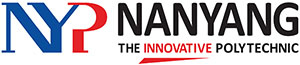

# Practical: Basic TensorFlow

## Objectives

- Understand the basic concepts of TensorFlow
- Work with tensors (constants and constants)
- Using ```tf.function``` to create a dataflow graph
- Construct and execute dataflow graphs
- Use tensorboard to visualize data

## Introduction

__TensorFlow__ is an open source framework for machine learning offered by Google. Google has been using TensorFlow in their services and products in the areas of speech recognition, email application, photos etc.

TensorFlow is designed for heavy computational tasks and relies on the concept of dataflow graphs. It abstracts many of the difficult mathematics concepts and operations so that users can concentrate on developing machine learning solutions without being bore down by the mathematical operations.

In this session, we will look at the how to work with tensors using variables and constant, we will also use tf.function annotation to setup TensorFlow dataflow graph. Lastly, we will also see how to use __TensorBoard__ which helps in visualization of data generated from TensorFlow.


### Checking TensorFlow version

There is a big difference between TensorFlow version 1.x and 2.x. Let us import check that we are using the correct version installed.

Enter the follwing codes to print our the TensorFlow version

```python
import tensorflow as tf

print(tf.__version__)
```


In [ ]:
#Enter your codes here


Ensure that the version printed is version 2.0 or above.

### Check Devices

TensorFlow is able to make use of multiple computational devices (CPUs, GPUs and TPUs) installed on a machine. It will be able to automatically select the best device to run its tasks.

Use the following codes to print out the devices installed on the machine

```python
print(tf.config.list_physical_devices())
print("Number of CPUs", len(tf.config.list_physical_devices('CPU')))
print("Number of GPUs", len(tf.config.list_physical_devices('GPU')))
```

In [ ]:
#Enter your codes here



Your should see similar results as follows:

```
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Number of CPUs 1
Number of GPUs 1
```

In the above result, we see that the machine includes 2 physical devices, a CPU (named CPU:0) and a GPU (named GPU:0). Your result may defer depending on the configuration of your machine.

The following shows result from running on Google Colab:

```
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')]
Number of CPUs 1
Number of GPUs 0
```

XLA refers to accelerated linear algebra (XLA), a special compiler used by Google Colab that can speed up machine learning tasks.

## 1. Creating Tensors (Data)

TensorFlow works exclusive on tensors. Tensors are similar to numpy array but can be of a higher dimension (rank). Numpy arrays can be easily converted to Tensors in TensorFlow.

In TensorFlow, we create either the tensor as _constants_ or a _variable_. Let us see some examples on creating constantsand variables.

For illustration purpose, we will use TensorFlow to help us calculate the volume of a cone (TensorFlow can be used for tasks other then machine learning).


We will also print them to the output.

```python
#Creating Tensors - Variables and Constants

#Declare a constant, Notice the lower-letter c for constant
constant = tf.constant(3.142, name="constant", dtype=tf.float32)

#Declare a variable, notice the capital V for Variable
parameter = tf.Variable(10, name="parameter", dtype=tf.float32)

#No Placeholder in TensorFlow version 2
#The role is indicated by the trainable argument
#Declare a placeholder
hyper_parameter = tf.Variable(0, name="hyper_parameter", trainable=False, dtype=tf.float32)

print(constant)
print(parameter)
print(parameter.trainable)
print(hyper_parameter)
print(hyper_parameter.trainable)
```

If you run the codes, you will see that the constant is of type ```Tensor``` while the variables are of type ```Variable```. Variables is a special type of tensor.

```
tf.Tensor(3.142, shape=(), dtype=float32)
<tf.Variable 'parameter:0' shape=() dtype=float32, numpy=10.0>
True
<tf.Variable 'hyper_parameter:0' shape=() dtype=float32, numpy=0.0>
False
```

The output provides information about each of the tensor/variables. A trainable variable will be tracked for optimization during training process.

In [ ]:
#Enter your codes here



The variables created previously was a scalar variable. We can also create 1D tensors by passing in python list or numpy arrays.

```python

#Import Numpy
import numpy as np

python_list = [1.0, 2.0]
python_list_2 = [3.0, 4.0]

v1 = tf.Variable(python_list, dtype=tf.float32)
v2 = tf.Variable(python_list_2, dtype=tf.float32)

print(v1)
print(v2)

```


In [ ]:
#Enter your codes here



If you run the codes, you should get the following results:

```
<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([1., 2.], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([1., 2.], dtype=float32)>
```

As can be seen from the output, we have created 2 TensorFlow variables, that are the same, note that they even have the same name 

## Writing a TensorFlow Operations

Let us now write use a simple example to write some Python codes using TensorFlow operations. For illustration purpose, we will use the TensorFlow to calcualte the volume of a cone.

Volume of a cone = $\frac{1}{3}{\pi}r^2h$, where r is the radius of the base and h is the height of the cone.

![volume-of-cone-2.png](attachment:volume-of-cone-2.png)

Add the following codes to construct a dataflow graph and execute it to find the volume of a cone. The included comments explains the purpose of each of the lines.

```python
#Declare value of pi as a constant tensor
pi = tf.constant(3.142, name="pi", dtype=tf.float32)

#Define a python volume function that calculates
#the volume based on the radius and height arguments
def volume(radius, height):
    op1 = tf.pow(radius, 2)
    op2 = tf.multiply(pi, op1)
    op3 = tf.multiply(op2, height)
    return tf.divide(op3, 3.0)

#Declare variables for height and radius. Notice the capital V for Variable
radius = tf.Variable(5, name="radius", dtype=tf.float32)
height = tf.Variable(7, name="height", dtype=tf.float32)

#Call our volume function
result = volume(radius, height)
#print out the results
print(result)
```

Make sure to read the comments to understand the required steps.

In [ ]:
#Enter your codes here


If you execute the codes, you should see the following output.

```
tf.Tensor(183.28333, shape=(), dtype=float32)
```

We have used the TensorFlow operations to perform some calculations. Note that the codes can be difficult to read using operations this way. Actually we can use the usually Python operators like +, -, /, * etc to perform the operation.

Rewrite the volume function as follows and execute the codes again. 

```python
def volume(radius, height):
    return (pi * radius**2 * height)/3.0
```

You should get the same result.

The above demonstrates the use of classical Python codes that execute on TensorFlow.

## Creating DataFlow Graphs

The above codes runs on TensorFlow and does __eager execution__. Eager execution allows us to use Python syntax and classical programming techniques as well as use debugger to help us debug our program. It can also make use of GPUs visible to TensorFlow for speedy execution.

However, to really make use of the power of TensorFlow for computational tasks, we will need to set up dataflow graphs. In TensorFlow 2.0 and above, the process has been simplified via the use of ```tf.function``` annotation.

We will now construct a dataflow graph to calculate the volume of a cone using the tf.function annotation. All we have to do is to add the @tf.function annotation as follows:

```python
@tf.function #<-- Add this annotation just above the volume function definition
def volume(radius, height):
    return (pi * radius**2 * height)/3.0
```

Run the above codes and you should note that nothing seems to have changed, you still get the same result.

However, with the annotation, TensorFlow has used AutoGraph to generate a dataflow graph and executed the graph to produce the result, it will execute much faster compared to eager execution. This will be more apparent with complex computational tasks during training of deep learning models.

To show that the graph is indeed generated, let us print out the nodes of the graph using the concrete function generated by the @tf.function annotation.

Add the following at the end of the previous set of codes:

```python
my_function = volume.get_concrete_function(radius, height)
print(my_function)
graph_nodes = my_function.graph.as_graph_def().node
for node in graph_nodes:
    print(node.input, " to ", node.name)
```


In [ ]:
#You can test you codes here


If you are successful, you should see the following output:

```
tf.Tensor(183.28334, shape=(), dtype=float32)
<tensorflow.python.eager.function.ConcreteFunction object at 0x000002A506E75E48>
[]  to  radius
[]  to  height
['radius']  to  Pow/ReadVariableOp
[]  to  Pow/y
['Pow/ReadVariableOp', 'Pow/y']  to  Pow
[]  to  Mul/x
['Mul/x', 'Pow']  to  Mul
['height']  to  Mul_1/ReadVariableOp
['Mul', 'Mul_1/ReadVariableOp']  to  Mul_1
[]  to  truediv/y
['Mul_1', 'truediv/y']  to  truediv
['truediv', '^Mul_1/ReadVariableOp', '^Pow/ReadVariableOp']  to  Identity
```

As can be seen from the output above, we were able to retrieve the concrete function and print out each of the nodes in our dataflow graph.

### Exercise

Remove the ```@tf.function``` annotation and run the codes again. You should get the following error message:
```
AttributeError: 'function' object has no attribute 'get_concrete_function'
```
This shows that no concrete function is created and no graph is generated.

The above printout does not help us to visualize the graph generated very well. Let us now look at TensorBoard with provides a means to visualize execution results and graphs.


## Tensorboard

The TensorBoard comes installed with TensorFlow and it allows us to visualize the dataflow graph that we have constructed as well as monitor how values of tensors change over the course of execution.

We will now see how we can use Tensorboard in our work. To make use of TensorBoard, we have to make use of the ```tf.summary.FileWriter```.

Use the following codes to run our previous example and generated the graph to be visualized in TensorBoard:

```python
#Import datetime and os modules
import datetime
import os

#Number of values
NUMBER_OF_VALUES = 10

#Declare constants and variables, this time we generate a 1-D array of 10 numbers
pi = tf.constant(3.142, name="pi", dtype=tf.float32)
#Radius values will be from 0 to 9
radius = tf.Variable(tf.range(start=0, limit=NUMBER_OF_VALUES, dtype=tf.float32), name='Radius', dtype=tf.float32)
#Height will be kept at 1
height = tf.Variable(tf.ones([NUMBER_OF_VALUES,]), name='Height', dtype=tf.float32)

@tf.function
def volume(radius, height):
    return (pi * radius**2 * height)/3.0

#The following codes gets the current data and time
#to generate the directory name to store our output
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#All our outputs will be store in parent directory named logs
log_dir = os.path.join("logs", current_time)
#Print out the directory that stores data to be visualized 
print(log_dir)
#Create a summary writer
summary_writer = tf.summary.create_file_writer(log_dir)

# Bracket the volume function call with
# tf.summary.trace_on() and tf.summary.trace_export()
# to generate the graph
tf.summary.trace_on(graph=True, profiler=True)
result = volume(radius, height)
with summary_writer.as_default():
  tf.summary.trace_export(name="volume function", step=0, profiler_outdir=log_dir)

#We will also print out 10 values of
for i in range(NUMBER_OF_VALUES):
    print(result[i])
    with summary_writer.as_default():
        #Write out the value of calculated volume to the log directory
        tf.summary.scalar("Volume", result[i], step=i)

#Flush and close the writer
summary_writer.flush()
summary_writer.close()
```






In [ ]:
#Add your codes here



You should see the TensorBoard as shown below:

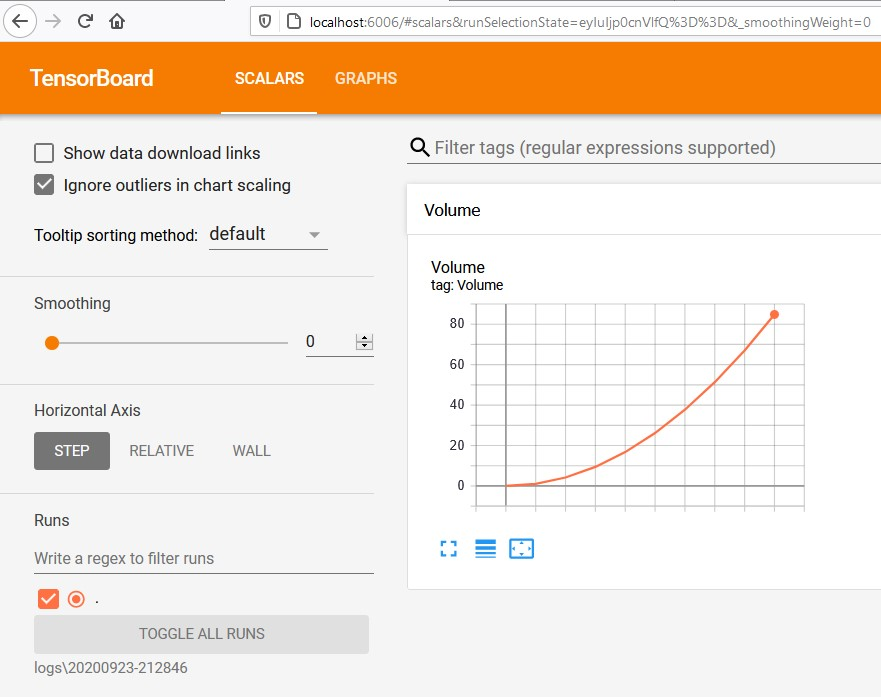

As can be seen from the figure, we are able to see a chart showing how the volume increases as the radius of the base increases from 0 to 9.

The chart is the result of the execution of the line

```python
tf.summary.scalar("Volume", result[i], step=i)
```

Note that TensorBoard displays the data by applying some smoothing operations, you can set the smoothing values to 0 to see the graph of the actual values. It is very common to use TensorBoard to display the optimization process during the training of a model using charts like what is shown here.

You should see the following result:

```
logs\20211004-212846
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0473334, shape=(), dtype=float32)
tf.Tensor(4.1893334, shape=(), dtype=float32)
tf.Tensor(9.426001, shape=(), dtype=float32)
tf.Tensor(16.757334, shape=(), dtype=float32)
tf.Tensor(26.183332, shape=(), dtype=float32)
tf.Tensor(37.704002, shape=(), dtype=float32)
tf.Tensor(51.319332, shape=(), dtype=float32)
tf.Tensor(67.029335, shape=(), dtype=float32)
tf.Tensor(84.834, shape=(), dtype=float32)
```

The line ```logs\20211004-212846``` shows path of the log directory. The other lines show the volume of a cone as radius increases from 0 to 9 with height kept at constant 1.

We can now view the dataflow graph as well as how our volume changes with the radius of the base of the cone.


## Starting TensorBoard

We can start TensorBoard on Calab using the load extension command as follows:

```python
%load_ext tensorboard
```

Once the TensorBoard is loaded, we can then issue the following command to visualize our data.

```
TensorBoard --logdir logs\20211004-212846
```
_Replace the directory name (logs\20211004-212846) with the directory name generated by your code._

The figure below shows the log directory generated by our codes and the logdir parameter.

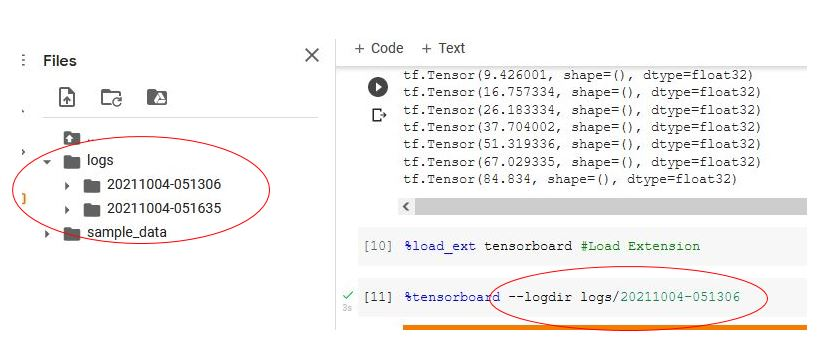


You should see be able to see the TensorBoard displayed.







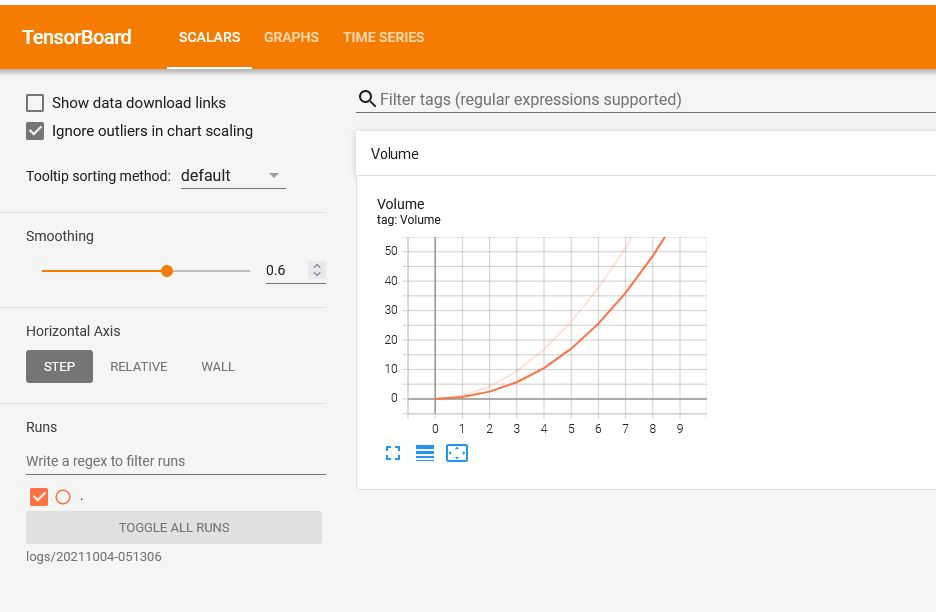

The graph shows how the volume changes as the value of the radius is increased. As expected, it is not increase in a linear fashion.




Recall that previously we printed out the nodes of the function? We can now visualize the graph using TensorBoard. Click on the GRAPHS hyperlink at the top of the page (besides SCALARS). You should see the following:

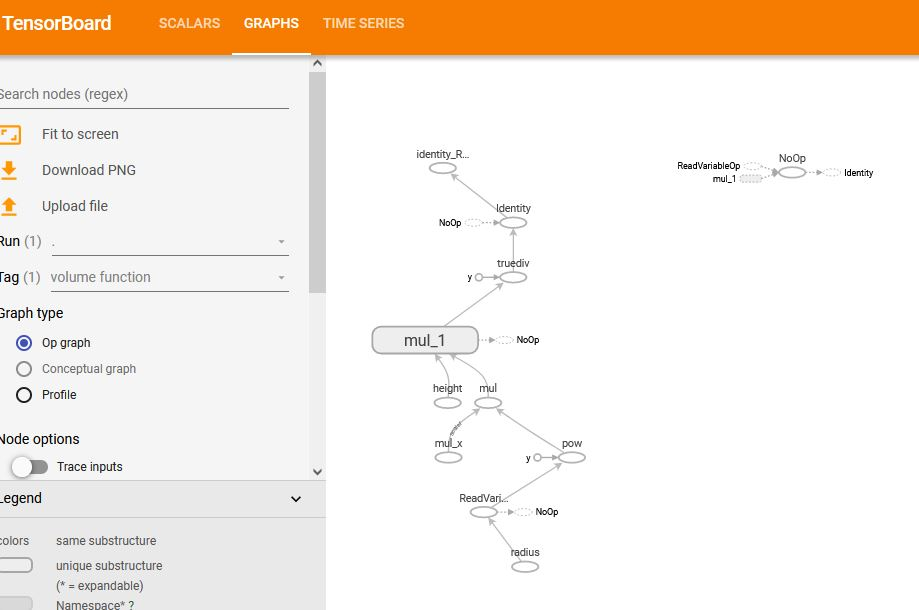

We can see from the visualzation how the dataflow graph is constructed by AutoGraph. From the bottom of the graph, we can see that the radius is read and raised to the power of y (value: 2), it is the multiplied with x (which is pi) and again multiplied with height and then divided by y (value: 3), a tensor is then created to store the result and returned. Each of the nodes is a TensorFlow operations that we created from our Python function.

## Exercise

The equation for Newton's Gravitational Law is shown below:

$$F = G\frac{m_1m_2}{r^2}$$

It indicates the force of attraction between two objects with mass $m_2$ and $m_2$. G is the gravitational constant and fixed at the value of $6.674 \times e^{-11}$. r is the distance between the two objects.

Construct a dataflow graph to calculate the force given values of $m_1$, $m_2$ and r. Use TensorBoard to visualize how the force varies with values of radius and m1 from 0 to 100 while m2 is kept constant at 1. Also use TensorBoard to visualize the dataflow graph.


In [ ]:
#Creating a graph to execute the equation



<details><summary>Click here for answer</summary>
<p>

```python
import tensorflow as tf
import datetime
import os

NUMBER_OF_VALUES = 100

current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = os.path.join("logs", current_time)
print(log_dir)
summary_writer = tf.summary.create_file_writer(log_dir)

#Create a constant and it will be added to the default graph
t_g = tf.constant(6.674e-11, name="G", dtype=tf.float32)

t_mass1 = tf.Variable(tf.range(start=0, limit=NUMBER_OF_VALUES, dtype=tf.float32), dtype=tf.float32, name="mass1")
t_mass2 = tf.Variable(tf.ones([NUMBER_OF_VALUES,]), name='mass2', dtype=tf.float32)
t_radius = tf.Variable(tf.range(start=0, limit=NUMBER_OF_VALUES, dtype=tf.float32), dtype=tf.float32, name="radius")

@tf.function
def force(m1, m2, r):
    return t_g * (m1 * m2) / r**2

tf.summary.trace_on(graph=True, profiler=True)
result = force(t_mass1, t_mass2, t_radius)
with summary_writer.as_default():
  tf.summary.trace_export(name="volume function", step=0, profiler_outdir=log_dir)

for i in range(NUMBER_OF_VALUES):
    print(result[i])
    with summary_writer.as_default():
        tf.summary.scalar("Force", result[i], step=i)

```
</p>
</details>

## The tf.debugging Module

As mentioned previously, we can debug our codes using eager execution and Python debugger to ensure our codes are working before using the tf.function annotation. But there are also some helpers in the ```tf.debugging``` module to help us catch some bugs.

The tf.debugging module defines a list of assert APIs for us to check our codes (see https://www.tensorflow.org/api_docs/python/tf/debugging) for a full list.

Let us now see how to use an assert statement and the check numeric APIs provided by the tf.debugging module.

### Check Numerics

Sometimes, we need to be certain that the data we feed into the training process are all numerics. We can use the tf.debugging.is_numeric_tensor() function to check. It will return False if the values are not all numbers _or_ it is not a tensor.

For example:

```python
import tensorflow as tf

tensor1 = tf.constant([1, 2, 3])
tensor2 = tf.constant(['a', 'b', 'c'])
print(tf.debugging.is_numeric_tensor(tensor1))
print(tf.debugging.is_numeric_tensor(tensor2))
```

The result will be ```True``` for tensor1 and ```False``` for tensor2.

Question: Will ```True``` or ```False``` be printed for the statement shown below?

```python
print(tf.debugging.is_numeric_tensor(tf.Variable([1, 2, 3])))
```
<details><summary>Click here for answer</summary>
<p>


```
False
```
    
This is because a Variable is not a tensor though it acts like a tensor and backed by a tensor.

</p>
</details>

In [ ]:
#Try your codes here

At times, it is even worse that during computations, we end up having our results being non-numeric, like inf (infinity) or NaN (Not-a-Number). No errors will actually be indicated.

Try the following:

```python
def my_divide(n1, n2):
    return n1/n2

def my_log(n1):
    return tf.math.sqrt(n1)

value1 = tf.Variable(10, dtype=tf.float32)
value2 = tf.Variable(0, dtype=tf.float32)
value3 = tf.Variable(-1.0, dtype=tf.float32)

print(my_divide(value1, value2))
print(my_log(value3))
```

Calling the function ```my_divide``` actually results in a infinity since we are dividing 10 by 0. Calling the function ```my_log``` should result in NaN since we are applying log operator on a negative number. However you will get the following results with no errors thrown:

```python
tf.Tensor(inf, shape=(), dtype=float32)
tf.Tensor(nan, shape=(), dtype=float32)
```

In order to check for such errors, we can add the following line at the beginning of our codes:

```python
tf.debugging.enable_check_numerics()
```

If you run again, you will see the following error:

```
InvalidArgumentError: 

!!! Detected Infinity or NaN in output 0 of eagerly-executing op "RealDiv" (# of outputs: 1) !!!
  dtype: <dtype: 'float32'>
  shape: ()
  # of +Inf elements: 1

  Input tensors (2):
         0: tf.Tensor(10.0, shape=(), dtype=float32)
         1: tf.Tensor(0.0, shape=(), dtype=float32)

 : Tensor had Inf values [Op:CheckNumerics]
```

You can use the following lines to disable the numeric checks if you want:


```python
tf.debugging.disable_check_numerics()
```



In [ ]:
#Test your codes here

### Assertions

It is useful to check for conditions of our data and execution to allow us to catch errors. There are many assert statement offered by tf.debugging. The following demonstrate how to use an assert statement.

For example, if we are expecting a tensor of shape (2, 2), we can add an assert statement as follows:

```python
tensor1 = tf.convert_to_tensor([[1, 2], [3, 4]])
tensor2 = tf.convert_to_tensor([1, 2, 3, 4])
print(tensor1)
print(tensor2)

tf.debugging.assert_shapes([
    (tensor1, (2, 2)), 
    (tensor2, (2, 2))
])
```

You will receive an error

```
...
ValueError: ('Static rank condition failed', 1, 2)
...
ValueError: .  Tensor  must have rank 2.  Received rank 1, shape (4,)
```

The assert statement will ensure that tensor1 and tensor2 are both of shape (2,2), or an error will be diplayed. You can use such assertion to catch error so that your codes are more robust. 


In [ ]:
# Try your codes here

## Summary

In this practical, we looked at the basic operations of TensorFlow. We look at constants, variables and operations. We also looked at how to execute operations using eager execution. We have also seen how adding a simple ```tf.function``` can help us construct dataflow graph easily.

Lastly, we examine how to use TensorBoard to visualize scalar values and dataflow graph.
